# Lab #5 - Radiation Statistics (Feb 4)

**Student name:** Liam Murray \
**Student number:** 87357539 \
**Partner:** Alexis Bushfield

## Section 1: Familiarize
In this stage we get familiar with the equipment, the analysis procedure, and to get a clear big-picture view of the experiment. This will help the rest of the experiment go more smoothly and you will be able to make informed decisions.

### Experimental Goal 🎯:
> Determine the best model (Poisson or Gaussian) for the statistical distribution of random events observed in a time interval.  
### Familiarize: Question
This is the start of your big-picture investigation. Some questions to ask ourselves are: 
- What is the goal of the experiment?
- What do we need to show to answer the question?
- What’s the final quantity or model that we need to achieve? 

### Measurement Plan
1. Using provided program, collect 60 second samples of background radiation with 0 sheets of shielding.
2. Allow timer to count for a 5 minute period of time (t [seconds]), then stop the timer and record the count (N).
    - The instrumental uncertainty in the value reported by the counter is negligible because we're highly certain of the events that lead to a count increase.
    - The uncertainty in time would be larger with lower numbers of shielding papers, this is because of a higher rate of detection by the counter. We have decided on a larger 95% Confidence Interval for trials with less shielding, where we will start at 2 seconds, then subtract 0.1 seconds for each piece of paper.

# Iterative Fitting

**Purpose:** This notebook will read a .csv file (comma-separated variables), and plot the data.
It will then use  ***iterative fitting*** to find the best fit of a specified function to the data; in this lab we will be comparing Normal and Poisson distributions. A residuals plot and $\chi^2$ value are provided to help diagnose the goodness-of-fit.

**How to use:** Duplicate this notebook, or copy and paste the relevant code cells into a new notebook. Remove the "explanation" markdown cells, and replace them with your own markdown cells for your lab report. Make sure you understand what the python code is doing at each step.

Fitting routine for discrete distributions is based on   https://www.delftstack.com/howto/python/python-fit-poisson-distribution/

## Setup and Data Entry:

First, import numpy (standard scientific/numerical python library) and matplotlib (standard plotting python library).

In [472]:
# Set up Python Facilities
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm
import math

%matplotlib inline

## Read in the data

In [473]:
#Identifying and reading the data into an 1-D array
datafile = "Round 1 Data.csv"
data_set = np.genfromtxt(datafile, delimiter=",", dtype=int)
print(data_set, np.max(data_set), np.min(data_set))

[384 352 387 395 401 392 411 372 388 392 404 409 426 344 398 417 377 362
 426 424 414 393 403 397 394 388 402 374 414 381 365 398 344 381 374 409
 387 382 403 370 389 445 419 400 374 375 390 407 372 384 388 394 399 387
 388 393 417 418 396 390 365 409 373 412 376 374 373 416 344 403 417 398
 360 426 374 394 387 422 382 392 396 340 400 388 393 367 366 357 381 383
 395 400 367 411 411 367 381 385 399 402] 445 340


## Histogram the data. The bins are normalized by the total number of entries to give the probability for each bin.  

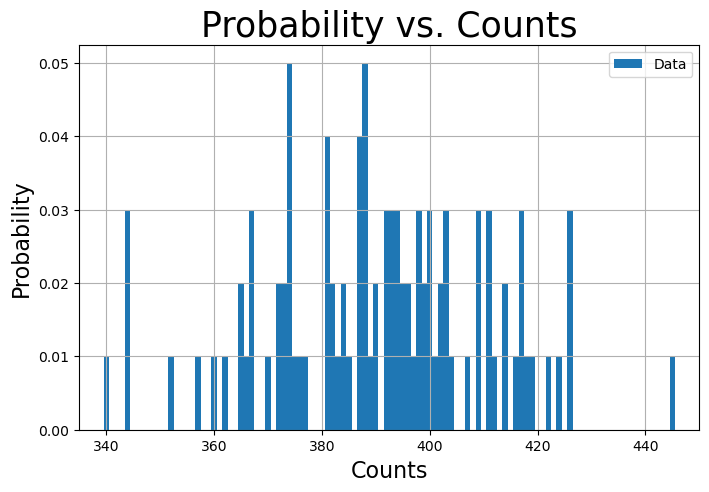

In [474]:
#Histogramming and Plotting the Data as Probabilities
n=np.max(data_set)+1 # number of bins to plot and fit
x_label = "Counts"
y_label = "Probability"
title = "Probability vs. Counts"# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(8, 5)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)
plt.xlim(np.min(data_set)-5, np.max(data_set)+5)
bins = np.arange(n+1) - 0.5
#Histogramming the data
entries, bin_edges, patches = plt.hist(data_set, bins=bins, density=True, label="Data")
# Calculate the bin centers
middles_bins = (bin_edges[1:] + bin_edges[:-1]) * 0.5
#print("histogram",len(data_set)*entries,"    ")
plt.legend()
plt.show()

## Calculate the Histogram entry errors (sqrt(counts))

In [475]:
# Histogram entry errors
for i in range(len(entries)):
    if entries[i]==0 : entries[i]=0.0001
dentries=np.sqrt(np.sum(data_set)*entries)/np.sum(data_set)#sqrt(N) uncertainty in each unnormalized histogram bin with N entries.
for i in range(len(entries)):
    if entries[i]==0.0001 : dentries[i]=1.2/np.sum(data_set)
print(np.sum(entries), entries, dentries)
for i in range(len(entries)):
    print(f'Histogram entry #{i+1}: {entries[i]:0.6e} ± {dentries[i]:0.1e}')

1.0394999999999999 [0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0

## Set the parameter bounds and initial parameters:

In [476]:
#Set Parameter Bounds ([lower bound1,lower bound2,...],[Upper bound1,Upper bound 2,...])
param_bounds=([330],[400])  
#Set Initial parameters (par1,par2,...)
initial_param=(340)  

## Fit the data with a Poisson distribution and plot:

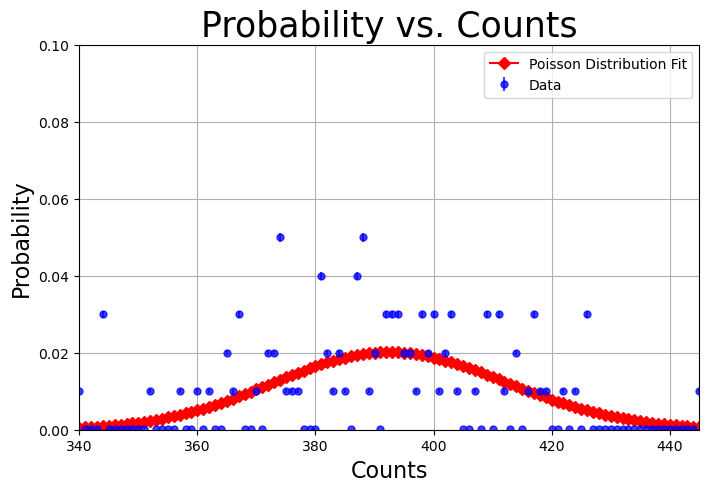

In [477]:
#Poisson Distribution (one parameter : mean =mu)
# mu = np.mean(data_set)
def fit_function(x,mu):
    # return norm.pdf(x,mu,np.std(data_set))
    return poisson.pmf(x, mu)
# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, middles_bins, entries, sigma=dentries, absolute_sigma=True,bounds=param_bounds, p0=initial_param, method='trf')
#parameters, cov_matrix = curve_fit(fit_function, middles_bins, entries, sigma=dentries, absolute_sigma=True,bounds=param_bounds, p0=initial_param)
#parameters, cov_matrix = curve_fit(fit_function, middles_bins, entries)
#Plot
x_label = "Counts"
y_label = "Probability"
title = "Probability vs. Counts"
# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(8, 5)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title
plt.xlim(np.min(data_set), np.max(data_set))
plt.ylim(0,0.1)
#Plot the data
x_plot = np.arange(0, n)
plt.errorbar(x_plot, entries, yerr=dentries, fmt="o", ms=5, color="blue", alpha=0.75, label="Data")
plt.plot(x_plot,fit_function(x_plot, *parameters),marker="D",linestyle="-",color="red", label="Poisson Distribution Fit")
#plt.plot(x_plot,fit_function(x_plot, 2),marker="D",linestyle="-",color="red", label="Poisson Distribution Fit")
plt.legend()
plt.show()

## Print the fit parameters (mu)

In [478]:
for i in range(len(parameters)):
    parameter_errors= np.sqrt(np.diag(cov_matrix))
    print(f'Parameter #{i+1}: {parameters[i]:0.6e} ± {parameter_errors[i]:0.1e}')

Parameter #1: 3.929775e+02 ± 1.1e-02


## Diagnose the fit results; plot the residuals; calculate the Chi-sq

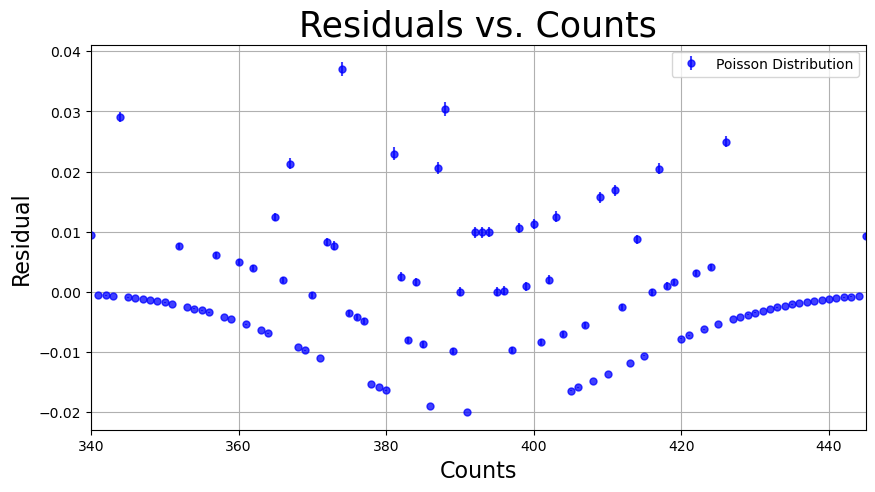

Chisq 8338.6906


In [479]:
#Plot the Residuals and calculate the Chi-sq
y_label = "Residual"
title = "Residuals vs. Counts"
# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(10, 5)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title
residual = entries - fit_function(x_plot, *parameters)
#plt.plot(x_plot,residual,marker="D", linestyle="None", color="red", label="Poisson Distribution Fit")
plt.errorbar(x_plot, residual, yerr=dentries,fmt="o", ms=5, color="blue", alpha=0.75,label="Poisson Distribution")
plt.legend()
plt.xlim(np.min(data_set), np.max(data_set))
plt.show()
# Calculate ndof
ndof = np.count_nonzero(entries) - len(parameters) - 1 # Number of degrees of freedom ndof = no. entries - no. parameters -1
#print(ndof)
#Calculate Chi-sq for non-zero entries
n_entries=np.count_nonzero(entries)
rru=0
for i in range(n_entries):
        rru = rru+np.power(residual[i]/dentries[i],2)
chisq =rru / ndof
print("Chisq", str.format("{0:.4f}", chisq))  # Print 4 significant figures

# Gaussian

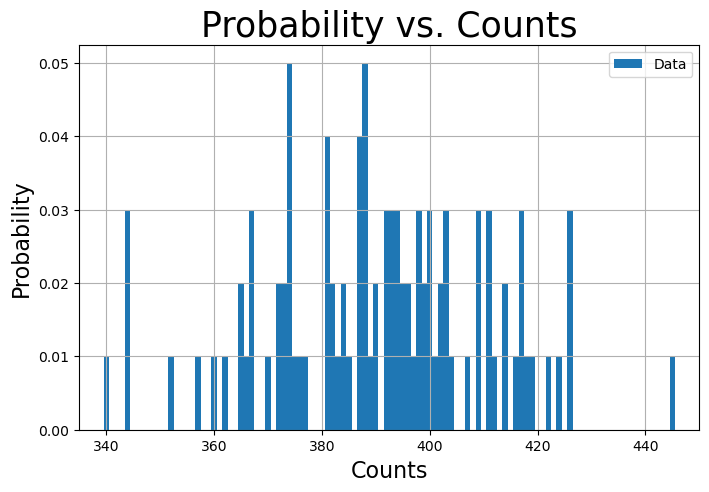

In [480]:
#Histogramming and Plotting the Data as Probabilities
n=np.max(data_set)+1 # number of bins to plot and fit
x_label = "Counts"
y_label = "Probability"
title = "Probability vs. Counts"# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(8, 5)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)
plt.xlim(np.min(data_set)-5, np.max(data_set)+5)
bins = np.arange(n+1) - 0.5
#Histogramming the data
entries, bin_edges, patches = plt.hist(data_set, bins=bins, density=True, label="Data")
# Calculate the bin centers
middles_bins = (bin_edges[1:] + bin_edges[:-1]) * 0.5
#print("histogram",len(data_set)*entries,"    ")
plt.legend()
plt.show()

## Calculate the Histogram entry errors (sqrt(counts))

In [481]:
# Histogram entry errors
for i in range(len(entries)):
    if entries[i]==0 : entries[i]=0.0001
dentries=np.sqrt(np.sum(data_set)*entries)/np.sum(data_set)#sqrt(N) uncertainty in each unnormalized histogram bin with N entries.
for i in range(len(entries)):
    if entries[i]==0.0001 : dentries[i]=1.2/np.sum(data_set)
print(np.sum(entries), entries, dentries)
for i in range(len(entries)):
    print(f'Histogram entry #{i+1}: {entries[i]:0.6e} ± {dentries[i]:0.1e}')

1.0394999999999999 [0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0

## Set the parameter bounds and initial parameters:

In [482]:
#Set Parameter Bounds ([lower bound1,lower bound2,...],[Upper bound1,Upper bound 2,...])
param_bounds=([350,1],[400,21])
print(np.std(data_set),
np.mean(data_set))  
#Set Initial parameters (par1,par2,...)
initial_param=(360,8)  

20.135726954843225 390.45


## Fit the data with a Poisson distribution and plot:

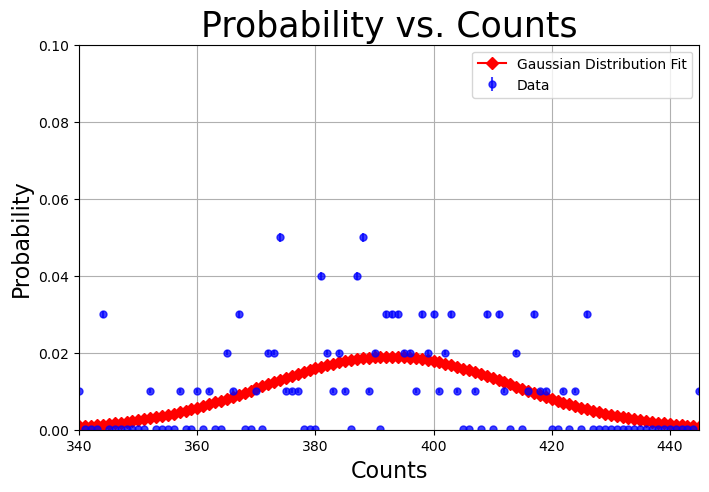

In [483]:
#Poisson Distribution (one parameter : mean =mu)
# mu = np.mean(data_set)
def fit_function(x,mu,std):
    return norm.pdf(x,mu,std)
    # return poisson.pmf(x, mu)
# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, middles_bins, entries, sigma=dentries, absolute_sigma=True,bounds=param_bounds, p0=initial_param, method='trf')
#parameters, cov_matrix = curve_fit(fit_function, middles_bins, entries, sigma=dentries, absolute_sigma=True,bounds=param_bounds, p0=initial_param)
#parameters, cov_matrix = curve_fit(fit_function, middles_bins, entries)
#Plot
x_label = "Counts"
y_label = "Probability"
title = "Probability vs. Counts"
# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(8, 5)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title
plt.xlim(np.min(data_set), np.max(data_set))
plt.ylim(0,0.1)
#Plot the data
x_plot = np.arange(0, n)
plt.errorbar(x_plot, entries, yerr=dentries, fmt="o", ms=5, color="blue", alpha=0.75, label="Data")
plt.plot(x_plot,fit_function(x_plot, *parameters),marker="D",linestyle="-",color="red", label="Gaussian Distribution Fit")
# plt.plot(x_plot,fit_function(x_plot, 2),marker="D",linestyle="-",color="red", label="Poisson Distribution Fit")
plt.legend()
plt.show()

## Print the fit parameters (mu)

In [484]:
for i in range(len(parameters)):
    parameter_errors= np.sqrt(np.diag(cov_matrix))
    print(f'Parameter #{i+1}: {parameters[i]:0.6e} ± {parameter_errors[i]:0.1e}')

Parameter #1: 3.924554e+02 ± 1.2e-02
Parameter #2: 2.100000e+01 ± 1.1e-02


## Diagnose the fit results; plot the residuals; calculate the Chi-sq

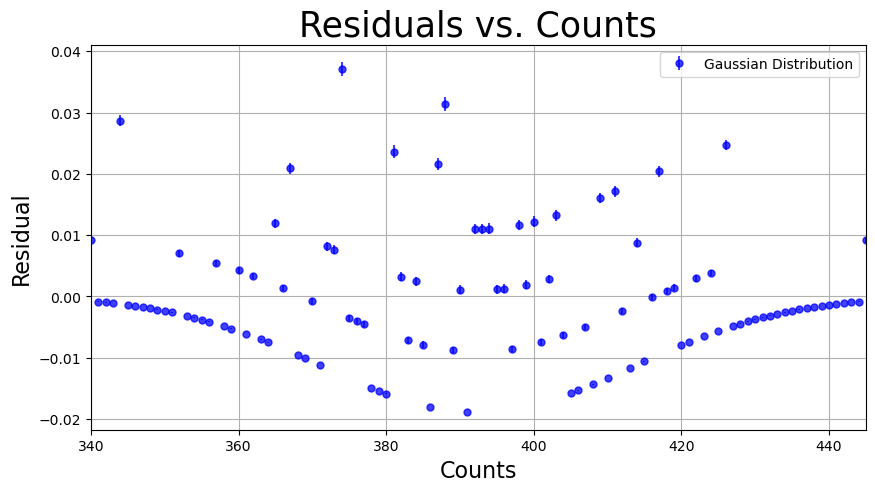

Chisq 8221.7481


In [485]:
#Plot the Residuals and calculate the Chi-sq
y_label = "Residual"
title = "Residuals vs. Counts"
# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(10, 5)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title
residual = entries - fit_function(x_plot, *parameters)
#plt.plot(x_plot,residual,marker="D", linestyle="None", color="red", label="Poisson Distribution Fit")
plt.errorbar(x_plot, residual, yerr=dentries,fmt="o", ms=5, color="blue", alpha=0.75,label="Gaussian Distribution")
plt.legend()
plt.xlim(np.min(data_set), np.max(data_set))
plt.show()
# Calculate ndof
ndof = np.count_nonzero(entries) - len(parameters) - 1 # Number of degrees of freedom ndof = no. entries - no. parameters -1
#print(ndof)
#Calculate Chi-sq for non-zero entries
n_entries=np.count_nonzero(entries)
rru=0
for i in range(n_entries):
        rru = rru+np.power(residual[i]/dentries[i],2)
chisq =rru / ndof
print("Chisq", str.format("{0:.4f}", chisq))  # Print 4 significant figures

#### Quick Summary:
The poisson and gaussian functions both look the same due to the limited data available to fit. The residuals look strange due to the discontinuous data within the set. Below is a table that illustrates the slight improvement the Gaussian provides when fitting, as you can control more variables.

|                    | Poisson         | Gaussian           |
|--------------------|-----------------|--------------------|
| Parameter 1 (STD)  |                 | $390 ± 1.2\cdot 10^{-2}$   |
| Parameter 2 (Mean) | $3.93 \pm 1.1 \cdot 10^{-2}$ | $21 \pm 1.1\cdot 10^{-2}$ |
| $\chi^2$           | 8338.69         | 8221.75            |

# Round 2 of Data Collection
**Plan for Improvement:** \
Collect data for 10 seconds using 5 shielding thickness, and analyze it's impacts on the graphs.

In [486]:
#Identifying and reading the data into an 1-D array
datafile = "Round 2 Data.csv"
data_set = np.genfromtxt(datafile, delimiter=",", dtype=int)
print(data_set, np.mean(data_set), np.max(data_set), np.min(data_set))

[34 22 29 30 21 27 18 26 23 20 29 26 23 24 29 20 21 25 21 25 27 25 19 20
 23 24 27 29 33 25 29 22 26 23 28 30 22 19 31 21 27 32 21 22 31 31 21 15
 35 34] 25.3 35 15


## Histogram the data. The bins are normalized by the total number of entries to give the probability for each bin.  

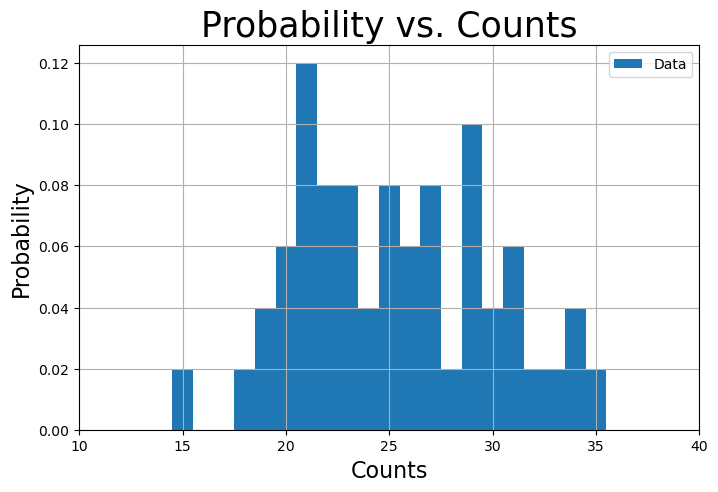

In [487]:
#Histogramming and Plotting the Data as Probabilities
n=np.max(data_set)+1 # number of bins to plot and fit
x_label = "Counts"
y_label = "Probability"
title = "Probability vs. Counts"# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(8, 5)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)
plt.xlim(np.min(data_set)-5, np.max(data_set)+5)
bins = np.arange(n+1) - 0.5
#Histogramming the data
entries, bin_edges, patches = plt.hist(data_set, bins=bins, density=True, label="Data")
# Calculate the bin centers
middles_bins = (bin_edges[1:] + bin_edges[:-1]) * 0.5
#print("histogram",len(data_set)*entries,"    ")
plt.legend()
plt.show()

## Calculate the Histogram entry errors (sqrt(counts))

In [488]:
# Histogram entry errors
for i in range(len(entries)):
    if entries[i]==0 : entries[i]=0.0001
dentries=np.sqrt(np.sum(data_set)*entries)/np.sum(data_set)#sqrt(N) uncertainty in each unnormalized histogram bin with N entries.
for i in range(len(entries)):
    if entries[i]==0.0001 : dentries[i]=1.2/np.sum(data_set)
print(np.sum(entries), entries, dentries)
for i in range(len(entries)):
    print(f'Histogram entry #{i+1}: {entries[i]:0.6e} ± {dentries[i]:0.1e}')

1.0017 [1.0e-04 1.0e-04 1.0e-04 1.0e-04 1.0e-04 1.0e-04 1.0e-04 1.0e-04 1.0e-04
 1.0e-04 1.0e-04 1.0e-04 1.0e-04 1.0e-04 1.0e-04 2.0e-02 1.0e-04 1.0e-04
 2.0e-02 4.0e-02 6.0e-02 1.2e-01 8.0e-02 8.0e-02 4.0e-02 8.0e-02 6.0e-02
 8.0e-02 2.0e-02 1.0e-01 4.0e-02 6.0e-02 2.0e-02 2.0e-02 4.0e-02 2.0e-02] [0.00094862 0.00094862 0.00094862 0.00094862 0.00094862 0.00094862
 0.00094862 0.00094862 0.00094862 0.00094862 0.00094862 0.00094862
 0.00094862 0.00094862 0.00094862 0.00397621 0.00094862 0.00094862
 0.00397621 0.00562322 0.006887   0.0097397  0.00795243 0.00795243
 0.00562322 0.00795243 0.006887   0.00795243 0.00397621 0.00889108
 0.00562322 0.006887   0.00397621 0.00397621 0.00562322 0.00397621]
Histogram entry #1: 1.000000e-04 ± 9.5e-04
Histogram entry #2: 1.000000e-04 ± 9.5e-04
Histogram entry #3: 1.000000e-04 ± 9.5e-04
Histogram entry #4: 1.000000e-04 ± 9.5e-04
Histogram entry #5: 1.000000e-04 ± 9.5e-04
Histogram entry #6: 1.000000e-04 ± 9.5e-04
Histogram entry #7: 1.000000e-04 ± 9.5e

## Set the parameter bounds and initial parameters:

In [489]:
#Set Parameter Bounds ([lower bound1,lower bound2,...],[Upper bound1,Upper bound 2,...])
param_bounds=([20],[30])  
#Set Initial parameters (par1,par2,...)
initial_param=(25.5)  

## Fit the data with a Poisson distribution and plot:

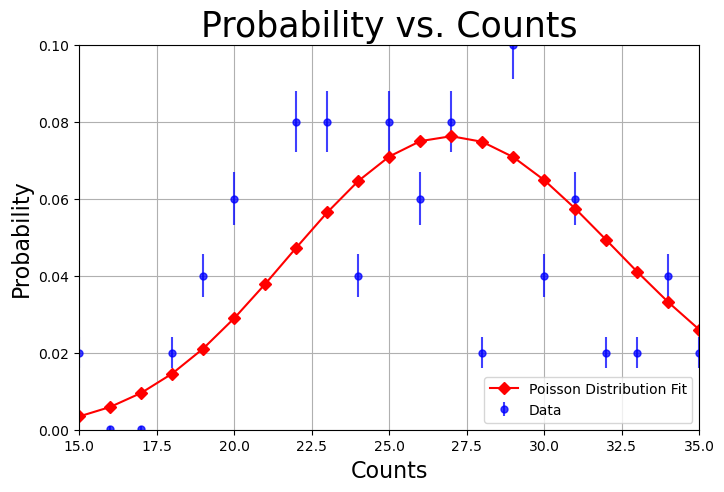

In [490]:
#Poisson Distribution (one parameter : mean =mu)
# mu = np.mean(data_set)
def fit_function(x,mu):
    # return norm.pdf(x,mu,np.std(data_set))
    return poisson.pmf(x, mu)
# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, middles_bins, entries, sigma=dentries, absolute_sigma=True,bounds=param_bounds, p0=initial_param, method='trf')
#parameters, cov_matrix = curve_fit(fit_function, middles_bins, entries, sigma=dentries, absolute_sigma=True,bounds=param_bounds, p0=initial_param)
#parameters, cov_matrix = curve_fit(fit_function, middles_bins, entries)
#Plot
x_label = "Counts"
y_label = "Probability"
title = "Probability vs. Counts"
# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(8, 5)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title
plt.xlim(np.min(data_set), np.max(data_set))
plt.ylim(0,0.1)
#Plot the data
x_plot = np.arange(0, n)
plt.errorbar(x_plot, entries, yerr=dentries, fmt="o", ms=5, color="blue", alpha=0.75, label="Data")
plt.plot(x_plot,fit_function(x_plot, *parameters),marker="D",linestyle="-",color="red", label="Poisson Distribution Fit")
#plt.plot(x_plot,fit_function(x_plot, 2),marker="D",linestyle="-",color="red", label="Poisson Distribution Fit")
plt.legend()
plt.show()

## Print the fit parameters (mu)

In [491]:
for i in range(len(parameters)):
    parameter_errors= np.sqrt(np.diag(cov_matrix))
    print(f'Parameter #{i+1}: {parameters[i]:0.6e} ± {parameter_errors[i]:0.1e}')

Parameter #1: 2.746234e+01 ± 1.4e-01


## Diagnose the fit results; plot the residuals; calculate the Chi-sq

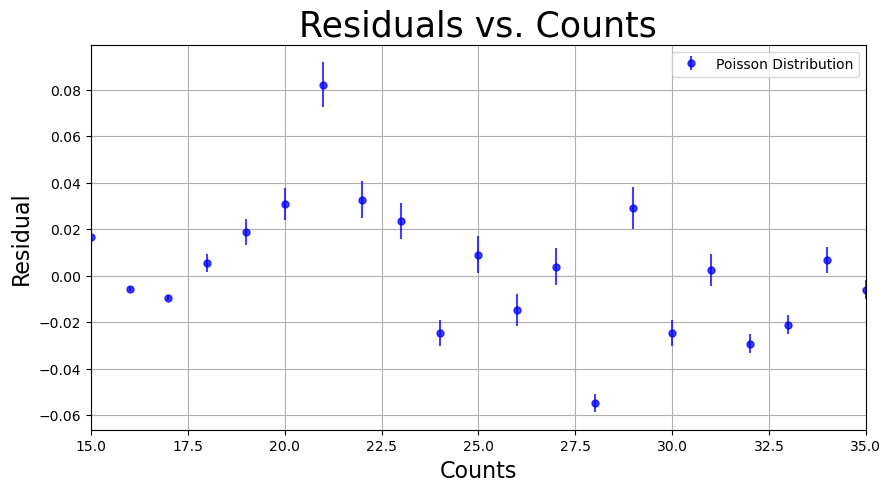

Chisq 18.2615


In [492]:
#Plot the Residuals and calculate the Chi-sq
y_label = "Residual"
title = "Residuals vs. Counts"
# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(10, 5)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title
residual = entries - fit_function(x_plot, *parameters)
#plt.plot(x_plot,residual,marker="D", linestyle="None", color="red", label="Poisson Distribution Fit")
plt.errorbar(x_plot, residual, yerr=dentries,fmt="o", ms=5, color="blue", alpha=0.75,label="Poisson Distribution")
plt.legend()
plt.xlim(np.min(data_set), np.max(data_set))
plt.show()
# Calculate ndof
ndof = np.count_nonzero(entries) - len(parameters) - 1 # Number of degrees of freedom ndof = no. entries - no. parameters -1
#print(ndof)
#Calculate Chi-sq for non-zero entries
n_entries=np.count_nonzero(entries)
rru=0
for i in range(n_entries):
        rru = rru+np.power(residual[i]/dentries[i],2)
chisq =rru / ndof
print("Chisq", str.format("{0:.4f}", chisq))  # Print 4 significant figures

# Gaussian

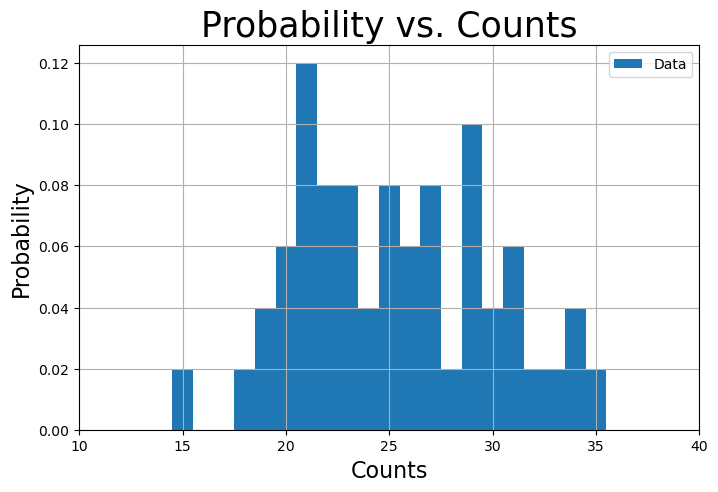

In [493]:
#Histogramming and Plotting the Data as Probabilities
n=np.max(data_set)+1 # number of bins to plot and fit
x_label = "Counts"
y_label = "Probability"
title = "Probability vs. Counts"# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(8, 5)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)
plt.xlim(np.min(data_set)-5, np.max(data_set)+5)
bins = np.arange(n+1) - 0.5
#Histogramming the data
entries, bin_edges, patches = plt.hist(data_set, bins=bins, density=True, label="Data")
# Calculate the bin centers
middles_bins = (bin_edges[1:] + bin_edges[:-1]) * 0.5
#print("histogram",len(data_set)*entries,"    ")
plt.legend()
plt.show()

## Calculate the Histogram entry errors (sqrt(counts))

In [494]:
# Histogram entry errors
for i in range(len(entries)):
    if entries[i]==0 : entries[i]=0.0001
dentries=np.sqrt(np.sum(data_set)*entries)/np.sum(data_set)#sqrt(N) uncertainty in each unnormalized histogram bin with N entries.
for i in range(len(entries)):
    if entries[i]==0.0001 : dentries[i]=1.2/np.sum(data_set)
print(np.sum(entries), entries, dentries)
for i in range(len(entries)):
    print(f'Histogram entry #{i+1}: {entries[i]:0.6e} ± {dentries[i]:0.1e}')

1.0017 [1.0e-04 1.0e-04 1.0e-04 1.0e-04 1.0e-04 1.0e-04 1.0e-04 1.0e-04 1.0e-04
 1.0e-04 1.0e-04 1.0e-04 1.0e-04 1.0e-04 1.0e-04 2.0e-02 1.0e-04 1.0e-04
 2.0e-02 4.0e-02 6.0e-02 1.2e-01 8.0e-02 8.0e-02 4.0e-02 8.0e-02 6.0e-02
 8.0e-02 2.0e-02 1.0e-01 4.0e-02 6.0e-02 2.0e-02 2.0e-02 4.0e-02 2.0e-02] [0.00094862 0.00094862 0.00094862 0.00094862 0.00094862 0.00094862
 0.00094862 0.00094862 0.00094862 0.00094862 0.00094862 0.00094862
 0.00094862 0.00094862 0.00094862 0.00397621 0.00094862 0.00094862
 0.00397621 0.00562322 0.006887   0.0097397  0.00795243 0.00795243
 0.00562322 0.00795243 0.006887   0.00795243 0.00397621 0.00889108
 0.00562322 0.006887   0.00397621 0.00397621 0.00562322 0.00397621]
Histogram entry #1: 1.000000e-04 ± 9.5e-04
Histogram entry #2: 1.000000e-04 ± 9.5e-04
Histogram entry #3: 1.000000e-04 ± 9.5e-04
Histogram entry #4: 1.000000e-04 ± 9.5e-04
Histogram entry #5: 1.000000e-04 ± 9.5e-04
Histogram entry #6: 1.000000e-04 ± 9.5e-04
Histogram entry #7: 1.000000e-04 ± 9.5e

## Set the parameter bounds and initial parameters:

In [495]:
#Set Parameter Bounds ([lower bound1,lower bound2,...],[Upper bound1,Upper bound 2,...])
param_bounds=([20,1],[30,10])
print(np.std(data_set),
np.mean(data_set))  
#Set Initial parameters (par1,par2,...)
initial_param=(25.3,4.7)  

4.652956049652737 25.3


## Fit the data with a Poisson distribution and plot:

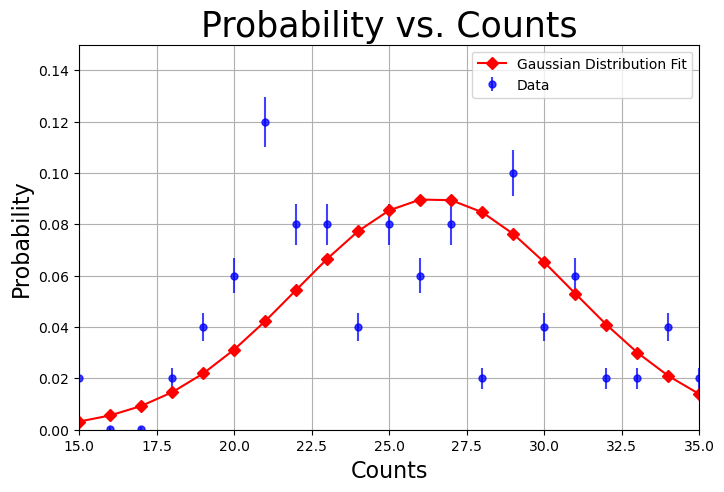

In [499]:
#Poisson Distribution (one parameter : mean =mu)
# mu = np.mean(data_set)
def fit_function(x,mu,std):
    return norm.pdf(x,mu,std)
    # return poisson.pmf(x, mu)
# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, middles_bins, entries, sigma=dentries, absolute_sigma=True,bounds=param_bounds, p0=initial_param, method='trf')
#parameters, cov_matrix = curve_fit(fit_function, middles_bins, entries, sigma=dentries, absolute_sigma=True,bounds=param_bounds, p0=initial_param)
#parameters, cov_matrix = curve_fit(fit_function, middles_bins, entries)
#Plot
x_label = "Counts"
y_label = "Probability"
title = "Probability vs. Counts"
# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(8, 5)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title
plt.xlim(np.min(data_set), np.max(data_set))
plt.ylim(0,0.15)
#Plot the data
x_plot = np.arange(0, n)
plt.errorbar(x_plot, entries, yerr=dentries, fmt="o", ms=5, color="blue", alpha=0.75, label="Data")
plt.plot(x_plot,fit_function(x_plot, *parameters),marker="D",linestyle="-",color="red", label="Gaussian Distribution Fit")
# plt.plot(x_plot,fit_function(x_plot, 2),marker="D",linestyle="-",color="red", label="Poisson Distribution Fit")
plt.legend()
plt.show()

## Print the fit parameters (mu)

In [497]:
for i in range(len(parameters)):
    parameter_errors= np.sqrt(np.diag(cov_matrix))
    print(f'Parameter #{i+1}: {parameters[i]:0.6e} ± {parameter_errors[i]:0.1e}')

Parameter #1: 2.644188e+01 ± 1.3e-01
Parameter #2: 4.426157e+00 ± 8.5e-02


## Diagnose the fit results; plot the residuals; calculate the Chi-sq

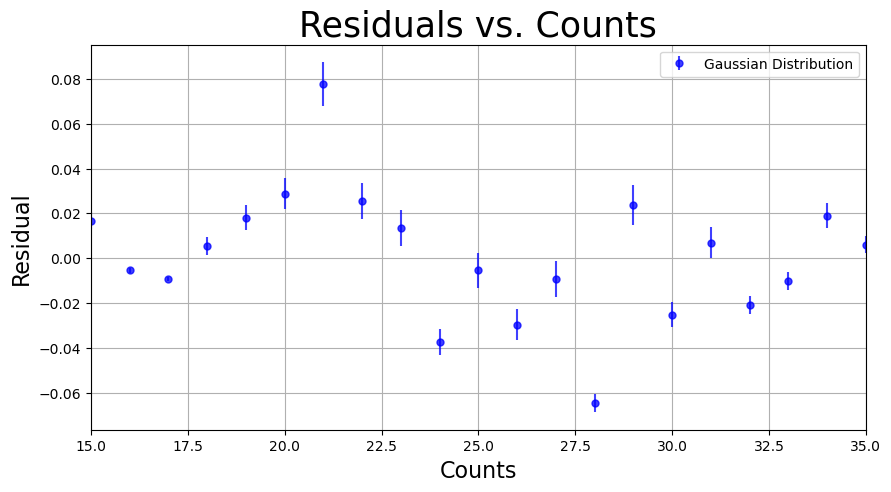

Chisq 20.0206


In [498]:
#Plot the Residuals and calculate the Chi-sq
y_label = "Residual"
title = "Residuals vs. Counts"
# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(10, 5)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title
residual = entries - fit_function(x_plot, *parameters)
#plt.plot(x_plot,residual,marker="D", linestyle="None", color="red", label="Poisson Distribution Fit")
plt.errorbar(x_plot, residual, yerr=dentries,fmt="o", ms=5, color="blue", alpha=0.75,label="Gaussian Distribution")
plt.legend()
plt.xlim(np.min(data_set), np.max(data_set))
plt.show()
# Calculate ndof
ndof = np.count_nonzero(entries) - len(parameters) - 1 # Number of degrees of freedom ndof = no. entries - no. parameters -1
#print(ndof)
#Calculate Chi-sq for non-zero entries
n_entries=np.count_nonzero(entries)
rru=0
for i in range(n_entries):
        rru = rru+np.power(residual[i]/dentries[i],2)
chisq =rru / ndof
print("Chisq", str.format("{0:.4f}", chisq))  # Print 4 significant figures

## Summary of Results
Across the two rounds of data, I found that the Gaussian model was best for the first data sample but the Poisson handled the second data round best. Overall, neither model did a fantastic job with the data provided, as they are intended to be used with much larger data sets. These observations can be reinforced by both visual analysis and the $\chi^2$ value, and these results are reflective of the behaviour of shielding as you reduce the spontaneity of emmissions when covering the source with more insulation. Overall, my investigation of the two models was inconclusive for the experimental goal to: 
> Determine the best model (Poisson or Gaussian) for the statistical distribution of random events observed in a time interval.  

My background radiation counts were 7,12,11,9 in 120 seconds, or 0.325 counts/sec. Though I was unsure of how this is incorperated into my graphing, because the counts were so far below any reasonable outliers.

|                    | Round 1                      |                           | Round 2                     |                           |
|--------------------|------------------------------|---------------------------|-----------------------------|---------------------------|
|                    | Poisson                      | Gaussian                  | Poisson                     | Gaussian                  |
| Parameter 1 (STD)  |                              | $390 ± 1.2\cdot 10^{-2}$  |                             | $26.4 ± 1.3 \dot 10^{-1}$ |
| Parameter 2 (Mean) | $3.93 \pm 1.1 \cdot 10^{-2}$ | $21 \pm 1.1\cdot 10^{-2}$ | $27.5 \pm 1.4 \dot 10^{-1}$ | $4.4 ± 8.5 \cdot{2}$      |
| $\chi^2$           | 8338.69                      | 8221.75                   | 18.26                       | 20.02                     |

Due to the weather conditions, I was unable to complete comparisons with other groups ☃️
